# Exploration done on the EPFL recommender system

In [2]:
from IPython.core.display import display, HTML
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split
import configparser
import mysql.connector as sql
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = 'retina'

# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
db_connection = sql.connect(host=credentials.get('mysql', 'url'),
                            database='semester_project_romain',
                            user=credentials.get('mysql', 'username'),
                            password=credentials.get('mysql', 'password'))

In [3]:
# Found courses that should be removed:
courses_to_remove = [
    "Admission année sup.",
    "Projet de master en systèmes de communication",
    "SHS : Introduction au projet",
    "Cycle master",
    "Projet de Master",
    "Groupe Core courses & options",
    "Bloc Projets et SHS",
    "Groupe 2 : Options",
    "Master SC",
    "Mineur",
    "Groupe 1",
    "Projet en systèmes de communication II",
    "Cours réservés spécifiquement aux étudiants s'inscrivant pour le mineur Area and Cultural Studies",
    "SHS : Projet",
    "Optional project in communication systems",
    "Mineur : Neurosciences computationnelles",
    "Stage d'ingénieur crédité avec le PDM (master en Systèmes de communication)",
    "Cours UNIL - Faculté des hautes études commerciales HEC I (printemps)",
]

domains_to_remove = [
    "Humanities and social sciences",
    "Programme Sciences humaines et sociales",
]

In [4]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID,
                SubjectName, 
                SubjectID,
                SectionName, 
                YearName,
                CourseCode
            from 
                course_enrolments_with_info 
            where 
                LevelName = "Master"
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
            """
all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
print(all_df.UnitName.unique())
all_df

DatabaseError: Execution failed on sql '
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID,
                SubjectName, 
                SubjectID,
                SectionName, 
                YearName,
                CourseCode
            from 
                course_enrolments_with_info 
            where 
                LevelName = "Master"
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
            ': 1146 (42S02): Table 'semester_project_romain.course_enrolments_with_info' doesn't exist

In [5]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID,
                SubjectName, 
                SubjectID,
                SectionName, 
                YearName,
                CourseCode
            from 
                course_enrolments_with_info 
            where 
                UnitName like "%nform%" 
                and 
                LevelName = "Master"
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
            """
all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
all_df

,PersonID,PedagogicalCode,StudyDomain,UnitName,UnitID,SubjectName,SubjectID,SectionName,YearName,CourseCode
0,254145864,MA2,Computer science,Informatique,249847,Computer vision,4650155,Informatique,2014-2015,None
1,898389891,MA2,Computer science,Informatique,249847,Distributed information systems,1773292,Informatique,2014-2015,CS-423
2,878085467,MA2,Electrical engineering,Informatique,249847,Social media,1501691751,Informatique,2014-2015,EE-593
3,353993617,MA2,Communication systems,Informatique,249847,Mobile networks,1771338,Informatique,2014-2015,None
4,354637713,MA2,Communication systems,Informatique,249847,Mobile networks,1771338,Informatique,2014-2015,COM-405
5,438981499,MA2,Computer science,Informatique,249847,Advanced computer architecture,1772055,Informatique,2014-2015,None
6,420576755,MA4,Electrical engineering,Informatique,249847,Media security,1771303,Systèmes de communication - master,2014-2015,None
8,245048742,MA2,Computer science,Informatique,249847,Distributed information systems,1773292,Informatique,2014-2015,None
9,898421111,MA2,Computer science,Informatique,249847,Real-time embedded systems,1771613,Informatique,2014-2015,CS-476
10,84133819,MA2,Computer science,Informatique,249847,Big Data,1678958548,Informatique,2014-2015,None


In [ ]:
current_courses = """
            select distinct 
                PedagogicalCode, 
                SubjectName, 
                SubjectID,
                StudyDomain,
                YearName
            from 
                course_enrolments_with_info 
            where 
                UnitName like "%ommunication%" 
                and 
                LevelName = "Master"
                and left(PedagogicalCode, 2) = "MA"
                and YearName = "2015-2016"
            """
current_courses_df = pd.read_sql(current_courses, con=db_connection)
# These are the current courses (latest data) given in syscom @EPFL
current_courses_df = current_courses_df[~current_courses_df.SubjectName.isin(courses_to_remove)]
current_courses_df = current_courses_df[~current_courses_df.StudyDomain.isin(domains_to_remove)]
current_courses_df

### Most taken courses
We need to find a way to get a cleaner dataset of courses, a lot of them are not usefull or outdated and should not be recommended.

In [6]:
# Taking a look at the most taken courses
registrations_df = all_df.set_index(['SubjectName', 'YearName'])
all_df_registrations = registrations_df.groupby(['SubjectName', 'YearName']).size()

registrations_df['Registration'] = all_df_registrations
registrations_df = registrations_df.reset_index()
# Pick only courses that have a study domain (removes bullshit)
# such as Projects and groups, minors etc
registrations_df = registrations_df[~registrations_df.StudyDomain.isnull()]
# Remove the SHS courses
registrations_df = registrations_df[~(registrations_df.StudyDomain == "Programme Sciences humaines et sociales")]
# Removes non important information
registrations_df = registrations_df.drop([
    'PersonID', "StudyDomain", "SectionName", "PedagogicalCode",
    "CourseCode"], axis=1)
registrations_df = registrations_df.drop_duplicates()
registrations_df = registrations_df.set_index(['SubjectName', 'YearName']).sort_index()
registrations = registrations_df.sort_values(ascending=False, by='Registration')

# Latest data registrations
registrations.xs('2015-2016', level='YearName')

,UnitName,UnitID,SubjectID,Registration
SubjectName,,,,
Distributed algorithms,Informatique,249847,1773287,256
Pattern classification and machine learning,Informatique,249847,1771468,248
Foundations of software,Informatique,249847,71840397,218
TCP/IP networking,Informatique,249847,1771764,218
Intelligent agents,Informatique,249847,1771183,214
Cryptography and security,Informatique,249847,1770973,202
Concurrent algorithms,Informatique,249847,231901032,180
Projet en informatique II,Informatique,249847,128676975,152
Unsupervised and reinforcement learning in neural networks,Informatique,249847,1771794,140


### Creating the binary matrix

In [7]:
courses_matrix = all_df[['PersonID', 'SubjectName']]
courses_matrix = courses_matrix.drop_duplicates()
courses_matrix = courses_matrix.set_index(['PersonID', 'SubjectName'])

def series_to_integers(series):
    "Converts a whole series to integers"
    return pd.to_numeric(series, downcast='integer')

# If the course was taken, set it to 1
courses_matrix['joined'] = 1
courses_matrix = courses_matrix.reset_index().pivot(index='PersonID', columns='SubjectName', values='joined')
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)
courses_matrix

SubjectName,Accounting for finance,Advanced Course in Combinatorial Geometry & Optimization I,Advanced Topics in Cryptology,Advanced Topics in Distributed Systems,Advanced Topics in Human Computer Interaction: the Case of Recommender Systems,Advanced VLSI design,Advanced algorithms,Advanced analysis I,Advanced analysis II,Advanced compiler construction,...,Traitement quantique de l'information II,Unsupervised and reinforcement learning in neural networks,Using Mathematica to analyse and model experimental data,VLSI design I,VLSI design I + EDA TP,VLSI design II,Virtual reality,Équivalence échange I,Équivalence échange II,Équivalence échange III
PersonID,,,,,,,,,,,,,,,,,,,,,
2412404,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2414145,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2436718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2480734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2501514,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2501538,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2505593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2523797,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting test/train

In [ ]:
# Total matrix, use it to split train and test
registrations_total = courses_matrix.unstack().reset_index()
registrations_total = registrations_total.rename(columns={0: "Taken"})
#test_set = registrations_total.sample(frac=0.2, replace=False)
#train_set = registrations_total - test_set
train, test = train_test_split(registrations_total, test_size=0.2)
print("We have {} rows in total".format(len(registrations_total)))
print("Train: {} rows".format(len(train)))
print("Test: {} rows".format(len(test)))

In [ ]:
# Back to training matrix
courses_matrix = train.pivot(index='PersonID', columns='SubjectName', values="Taken")
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)
courses_matrix

#### Collaborative filtering with Collaborative Denoising Auto-Encoders

In [158]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, merge, Activation
from keras.models import Model
from keras.regularizers import l2

def create(I, U, K, hidden_activation, output_activation, q=0.5, l=0.01):
    '''
    create model
    Reference:
      Yao Wu, Christopher DuBois, Alice X. Zheng, Martin Ester.
        Collaborative Denoising Auto-Encoders for Top-N Recommender Systems.
          The 9th ACM International Conference on Web Search and Data Mining (WSDM'16), p153--162, 2016.

    :param I: number of items
    :param U: number of users
    :param K: number of units in hidden layer
    :param hidden_activation: activation function of hidden layer
    :param output_activation: activation function of output layer
    :param q: drop probability
    :param l: regularization parameter of L2 regularization
    :return: CDAE
    :rtype: keras.models.Model
    '''
    x_item = Input((I,), name='x_item')
    h_item = Dropout(q)(x_item)
    h_item = Dense(K, W_regularizer=l2(l), b_regularizer=l2(l))(h_item)

    # dtype should be int to connect to Embedding layer
    x_user = Input((1,), dtype='int32', name='x_user')
    h_user = Embedding(input_dim=U, output_dim=K, input_length=1, W_regularizer=l2(l))(x_user)
    h_user = Flatten()(h_user)

    h = merge([h_item, h_user], mode='sum')
    if hidden_activation:
        h = Activation(hidden_activation)(h)
    y = Dense(I, activation=output_activation)(h)

    return Model(input=[x_item, x_user], output=y)

def success_rate(pred, true):
    cnt = 0
    for i in range(pred.shape[0]):
        t = np.where(true[i] == 1) # true set
        ary = np.intersect1d(pred[i], t)
        if ary.size > 0:
            cnt += 1
    return cnt * 100 / pred.shape[0]


train_users = np.arange(courses_matrix.shape[0])
test_users = np.arange(courses_matrix.shape[0])

flatten_matrix = courses_matrix.unstack().reset_index()

test_x = flatten_matrix.sample(frac=0.2, replace=False).set_index(['SubjectName', 'PersonID'])
test_x = test_x.pivot_table(index='PersonID', columns="SubjectName").fillna(0)
train_x = courses_matrix - test_x
train_x = train_x.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_x = test_x.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()


In [1]:
train_x_users = np.array(train_users, dtype=np.int32).reshape(len(train_users), 1)
test_x_users = np.array(test_users, dtype=np.int32).reshape(len(test_users), 1)

# model
# Q was 0.50, now 0.998 ?
model = create(I=train_x.shape[1], U=len(train_users)+1, K=21,
                    hidden_activation='relu', output_activation='sigmoid', q=0.998, l=0.01)
model.compile(loss='mean_absolute_error', optimizer='adam') 
#model.summary()

# train
history = model.fit(x=[train_x, train_x_users], y=train_x,
                    batch_size=128, nb_epoch=2000, verbose=1,
                    #validation_data=[[test_x, test_x_users],
                    #test_x])
                    validation_split=0.10)

# predict
#pred = model.predict(x=[train_x, np.array(train_users, dtype=np.int32).reshape(len(train_users), 1)])
pred = model.predict(x=[test_x, np.array(test_users, dtype=np.int32).reshape(len(test_users), 1)])
pred = pred * (train_x == 0) # remove watched items from predictions

pred = np.argsort(pred)

for n in range(1, 11):
    sr = success_rate(pred[:, -n:], test_x)
    print("Success Rate at {:d}: {:f}".format(n, sr))

NameError: name 'np' is not defined

In [ ]:
def precision(y_true, y_pred):
    if len(y_true.shape) > 1 and len(y_pred.shape) > 1:
        y_true = y_true.values.flatten()
        y_pred = y_pred.values.flatten()
    true_positive = sum((y_true == 1) & (y_pred == 1))
    false_positive = sum((y_true == 0) & (y_pred == 1))
    return true_positive/(true_positive + false_positive)
    
def recall(y_true, y_pred):
    if len(y_true.shape) > 1 and len(y_pred.shape) > 1:
        y_true = y_true.values.flatten()
        y_pred = y_pred.values.flatten()
    true_positive = sum((y_true == 1) & (y_pred == 1))
    false_negative = sum((y_true == 1) & (y_pred == 0))
    return  true_positive/(true_positive + false_negative)
    
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)

    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

#prediction = model.predict(x=[train_x, np.array(train_users, dtype=np.int32).reshape(len(train_users), 1)])
prediction = model.predict(x=[test_x, np.array(test_users, dtype=np.int32).reshape(len(test_users), 1)])
prediction = prediction * (train_x == 0) # remove watched items from predictions

baseline = 0.5
pred = prediction.copy()
pred[pred < baseline] = 0
pred[pred >= baseline] = 1
pred = pd.DataFrame(pred)
train_x_df = pd.DataFrame(train_x)
test_x_df = pd.DataFrame(test_x)
used = train_x_df

print("Baseline:")
print("\tPrecision:",precision(used, pred))
print("\tRecall:",recall(used, pred))
print("\tF1 score:",f1_score(used, pred))

for cutoff in np.arange(0.99985, 0.999951, 0.000005):
    pred = prediction.copy()
    print("Cutoff:", cutoff)
    pred[pred < cutoff] = 0
    pred[pred >= cutoff] = 1
    pred = pd.DataFrame(pred)
    train_x_df = pd.DataFrame(train_x)
    test_x_df = pd.DataFrame(test_x)
    used = train_x_df

    print("\tPrecision:",precision(used, pred))
    print("\tRecall:",recall(used, pred))
    print("\tF1 score:",f1_score(used, pred))

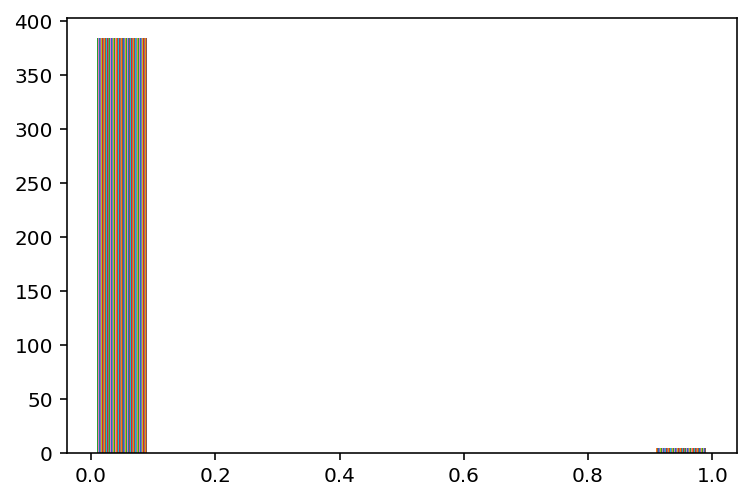

In [136]:
import matplotlib.pyplot as plt
plt.hist(pd.DataFrame(prediction).values.tolist())
plt.show()

Remove students not pairs, and test on them after training, remove k courses, see which ones pop up. Test on other domains. Try with all data. Compute f1. Plot precision and recall. Papers boi faltings on top k recommendations. Co enrollment matrix, weight probabilities of output by the student's chance of taking a course (obligatory). 

### Done
- All data gives really bad results (discrimination by section)
- Results are different from one domain to another (BEFORE WEIGHING OUT THE OBLIGATORY COURSES, or courses that are bloat (laboratories etc..., case by case basis ?)
- Computing the f1 score, prec and recall by row and average out
- [They talk a bit about top-N recommendation in this paper (Boi)](http://delivery.acm.org/10.1145/2810000/2800184/p179-maksai.pdf?ip=128.179.189.64&id=2800184&acc=ACTIVE%20SERVICE&key=FC66C24E42F07228%2E7E17DDD1CCA0F75B%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&CFID=1003867347&CFTOKEN=59100520&__acm__=1510214008_777b3b2b2f3763bb6c7aa57bcdcdf49a)

### Questions
- If we decide on keeping top-K recommendation metric, how would we deal with the fact that maybe there are clusters where the best K is 3, but others it will be 6 ?
- WTF: dropout was 0.50, now 0.998, way better results, higher dropout means less overfitting, so wtf ?
- Should weigh out the courses how ? In neural network or in ratings ?
- Are we sure on how to compute prec, rec, f1 ? For top-N rec sys, saw this:<br>The concept of ‘hit set’ is considered, containing only the recommended (top-N) items that are also in the test set.

    $recall = \frac{|hitset|}{|testset|}$
    <br>$precision = \frac{|hitset|}{N}$


### To do
- Move to the new data
- Take into account the study plan to compute percentage course taken (way of weighing)
- New precision and recall by user, and take average
- Pick k out of n for blocks, split options and obligatory recommendations
- Try on like 5 sections with same parameters if still good results
- Talk with Francisco about co enrolment matrix

In [155]:
print(courses_matrix.sum().sum())
baseline = 0.5
pred = prediction.copy()
pred[pred < baseline] = 0
pred[pred >= baseline] = 1
pred = pd.DataFrame(pred)
train_x_df = pd.DataFrame(train_x)
test_x_df = pd.DataFrame(test_x)

12048
2352


In [ ]:
flatten = courses_matrix.unstack().reset_index()
flatten = flatten.rename(columns={0:"Taken"})
random_user = flatten[(flatten.Taken == 1) & (flatten.PersonID == 974912207)]
random_user_id = courses_matrix.index.get_loc(key=974912207)
random_user_predictions = pred[random_user_id, -15:]
predicted_courses = [ courses_matrix.columns[i] for i in random_user_predictions ]

# Remove courses that were not given in the last year
last_year_courses = list(registrations.xs('2015-2016', level='YearName').index)
predicted_courses = [c for c in predicted_courses if c in last_year_courses]

print("The random user picked the following courses: \n{} \nHence we propose the following: {}"
     .format(random_user.SubjectName, predicted_courses[::-1] ))

In [ ]:
# Trying the Netflixprize solutions

In [ ]:
# Find other ones

In [ ]:
# Feature Engineering